# Diabetes Prediction by using Machine Learning:

Number of Observation Units: 

Variable Number:

# Eplor

In [1]:
#Installations

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import statsmodels.api as sm
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold


import warnings
warnings.simplefilter(action = "ignore") 



In [2]:
#Import Dataset:
dfile = pd.read_csv("UpdatedDiabetes.csv")

dfile.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Display the dataset size:
dfile.shape

(768, 10)

In [4]:
#Display feature information:
dfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 60.1 KB


In [5]:
#Display descriptive statistics of the data set:
dfile.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,76.700,191.75000,383.5000,575.25000,690.3000,728.65000,759.33000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [6]:
#Display the "distribution" of the outcome variable:
dfile["Outcome"].value_counts()*100/len(dfile)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [7]:
#Display the "classes" of the outcome variable:
dfile.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Max Age is: 81, Min Age is: 21


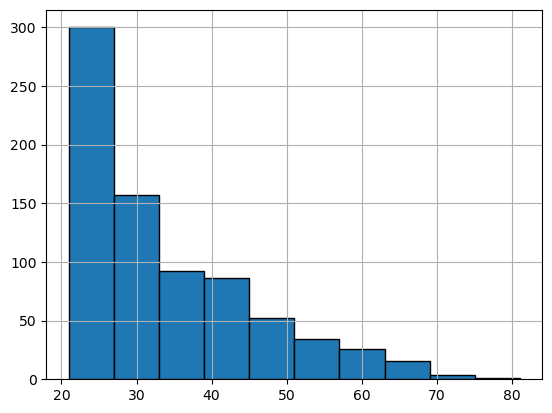

In [8]:
#Display a histagram of the "Age" variable:
dfile["Age"].hist(edgecolor = "black");

print("Max Age is: " + str(dfile["Age"].max()) + ", Min Age is: " + str(dfile["Age"].min()))

Max BMI is: 67.1, Min BMI is: 0.0


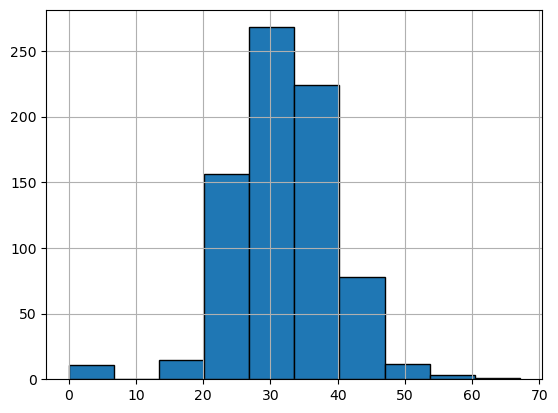

In [9]:
#Display a histagram of the "BMI" variable:
dfile["BMI"].hist(edgecolor = "black");

print("Max BMI is: " + str(dfile["BMI"].max()) + ", Min BMI is: " + str(dfile["BMI"].min()))

<Axes: xlabel='BMI', ylabel='Density'>

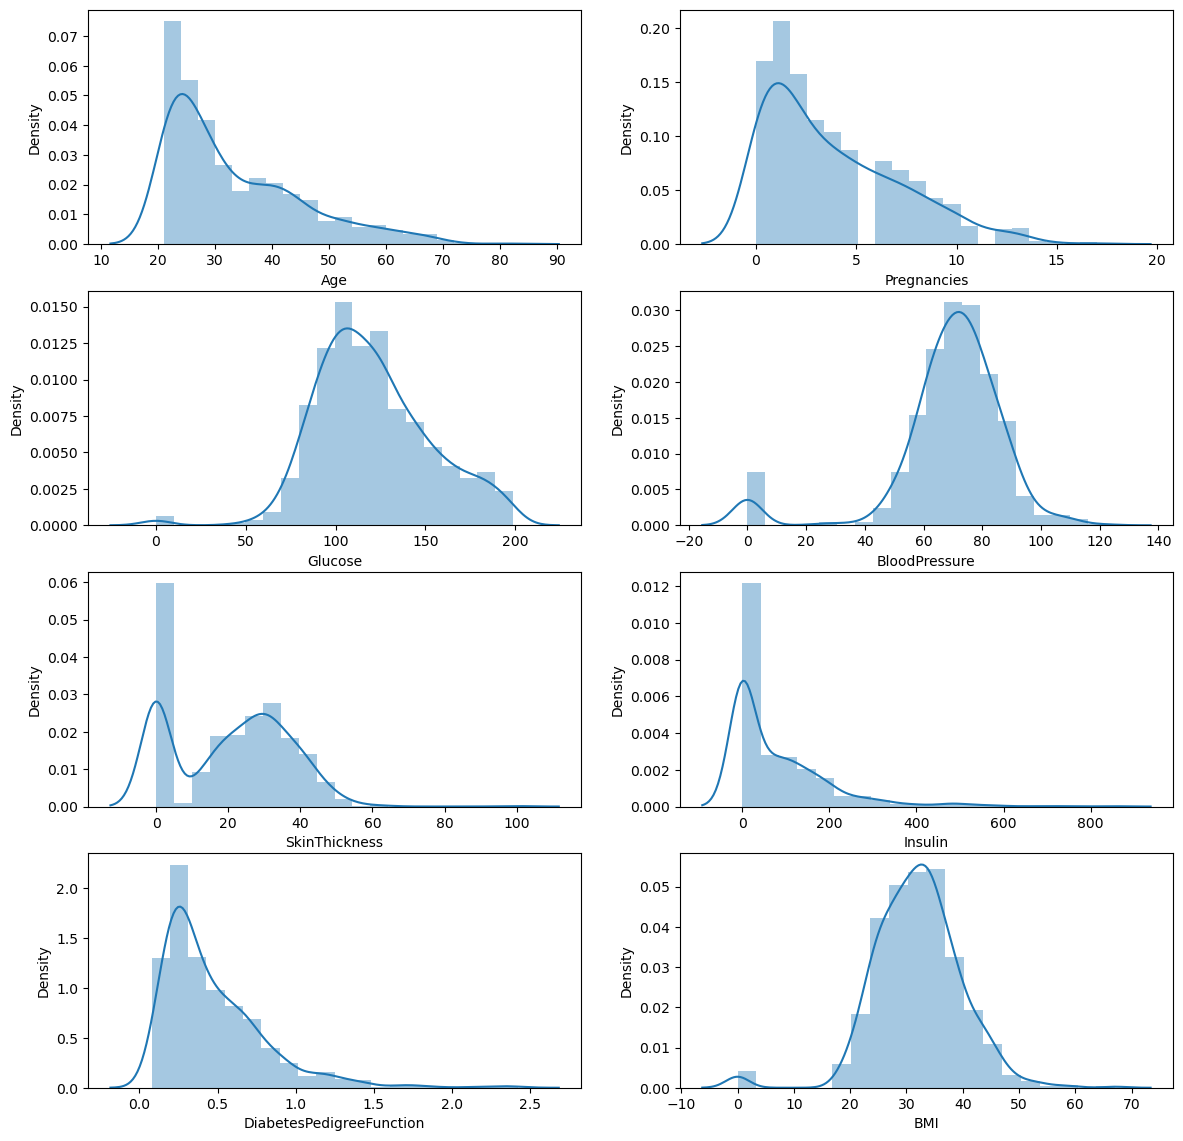

In [10]:
#Histogram and density graphs of all variables were accessed:
fig, ax = plt.subplots(4,2, figsize=(14,14))
sns.distplot(dfile.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(dfile.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(dfile.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(dfile.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(dfile.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(dfile.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(dfile.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(dfile.BMI, bins = 20, ax=ax[3,1]) 

In [11]:
#Group by "Age" and "mean":
dfile.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [12]:
#Group by "Age" and "max":
dfile.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [13]:
#Group by "Insulin" and "mean":
dfile.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [14]:
#Group by "Insulin" and "max":  
dfile.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [15]:
#Group by "Pregnancies" and "mean":
dfile.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [16]:
#Group by "Glucose" and "mean":
dfile.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [17]:
#Group by "Glucose" and "max":
dfile.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [18]:
#Group by "BMI" and "mean":
dfile.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


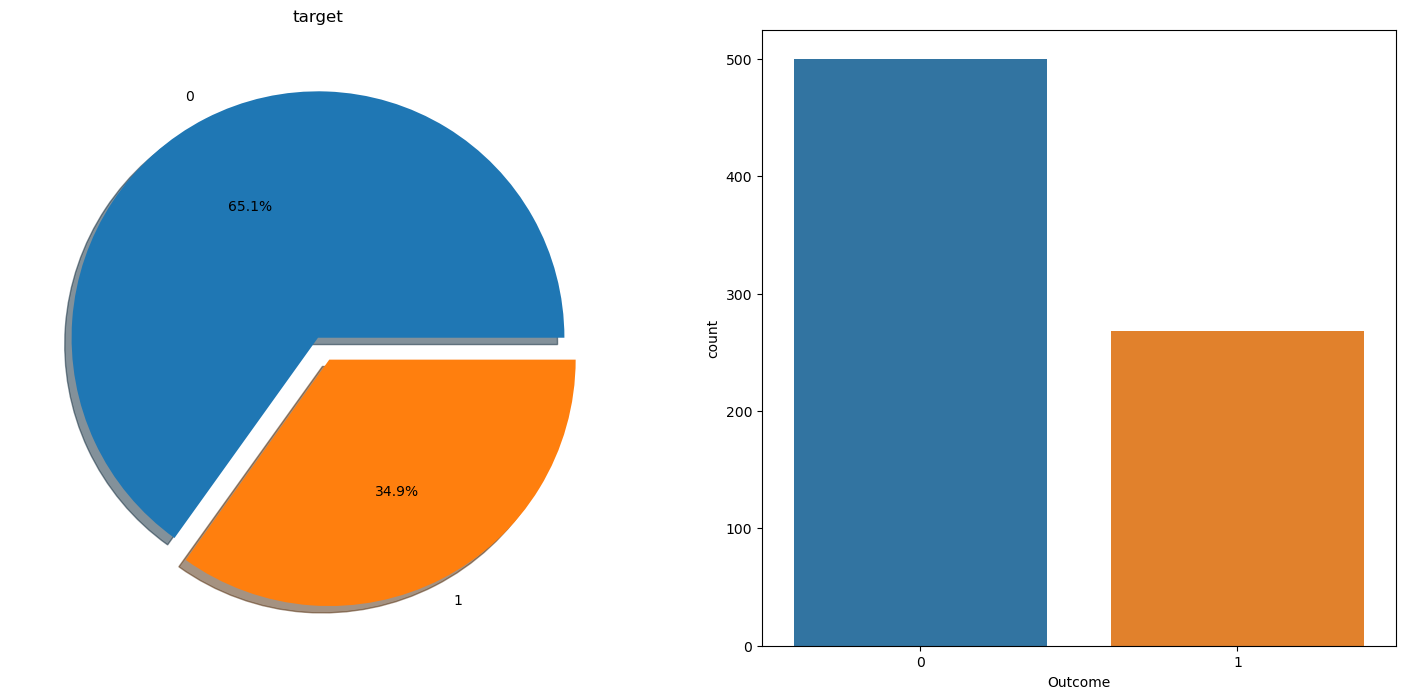

In [19]:
#Show the distribution of the outcome variable in the data:
f,ax=plt.subplots(1,2,figsize=(18,8))
dfile['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(data=dfile, x='Outcome')
plt.show()

In [20]:
# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables. 
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 is no correlation.
# If the correlation equates to <0, there is a negative correlation. While one variable increases, the other variable decreases. 
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# Example variable is: Glucose. As these increase, Outcome variable increases.
dfile.corr()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.000000,-0.037201,0.012994,0.020953,0.019006,0.001998,0.012320,-0.040326,0.007714,-0.045184
Pregnancies,-0.037201,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.012994,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.020953,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.019006,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.001998,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.012320,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.040326,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.007714,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,-0.045184,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


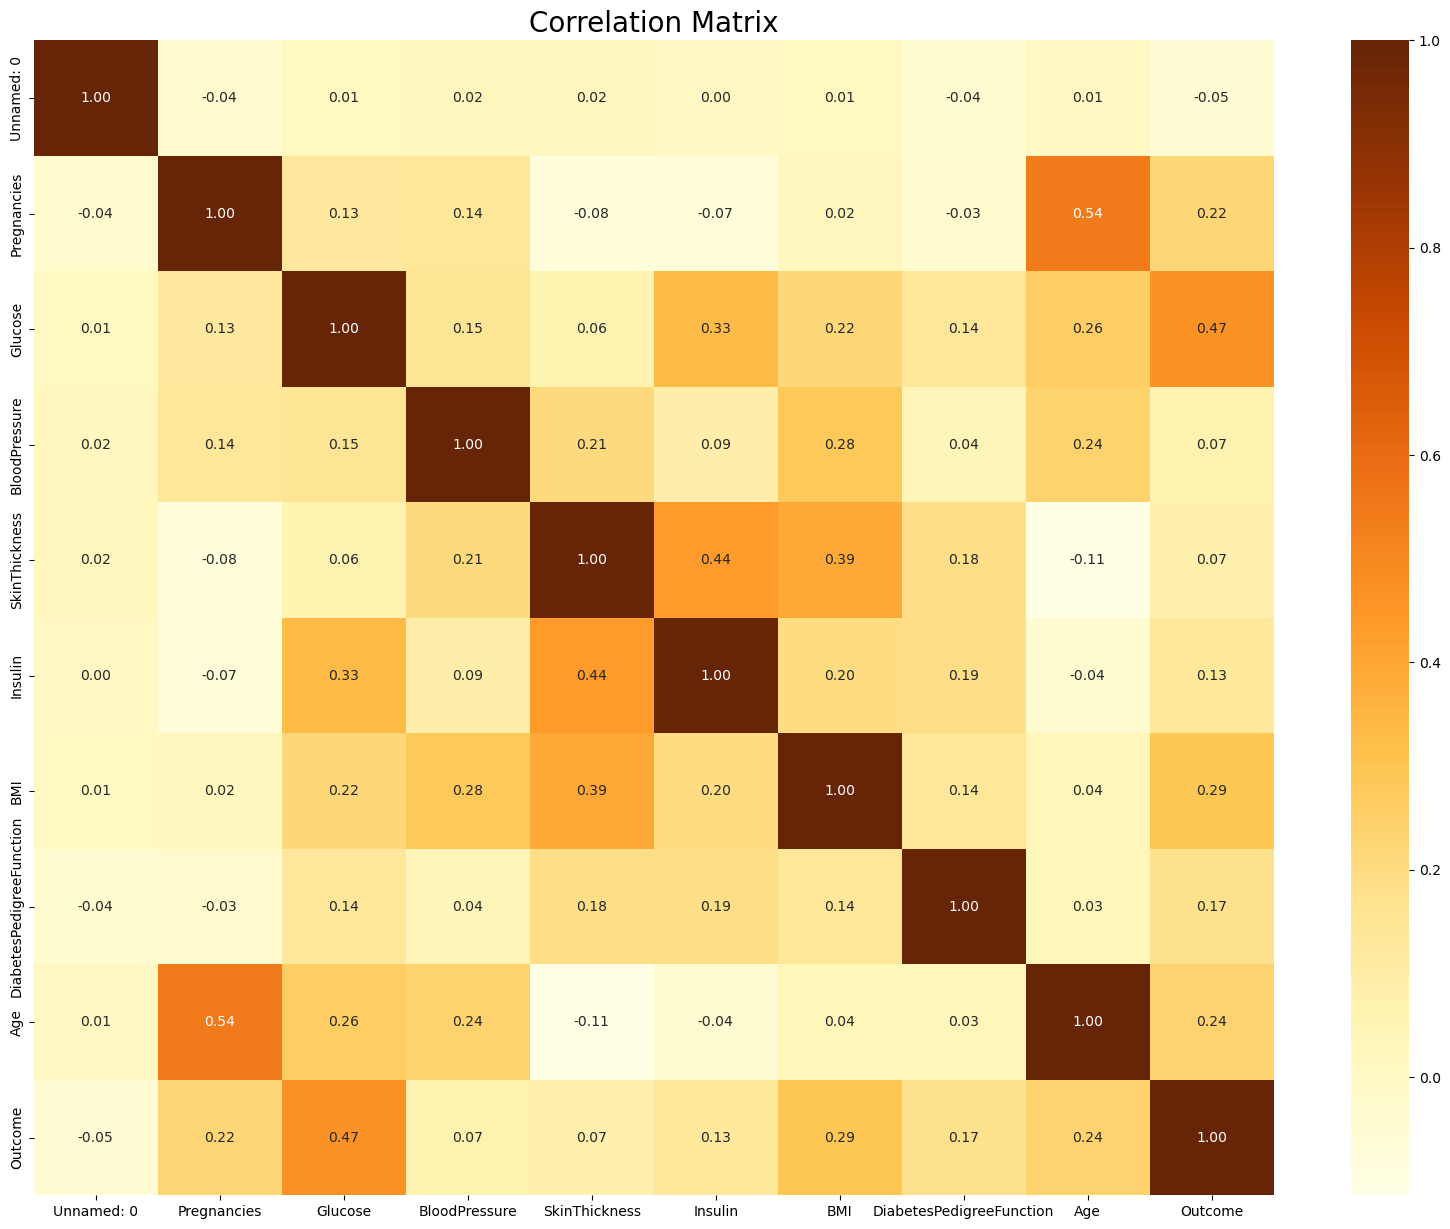

In [21]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(dfile.corr(), annot=True, fmt=".2f", ax=ax, cmap = "YlOrBr" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [22]:
#Renaming the Columns:
dfile[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dfile[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

dfile.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [23]:
#Attempt to drop the 'Unamed' value:
dfile.drop(columns=['Unnamed: 0'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [24]:
#Show Null/NaN values: PRE
dfile.isnull().sum()


Unnamed: 0                    0
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

##Remove Null/NaN Values:

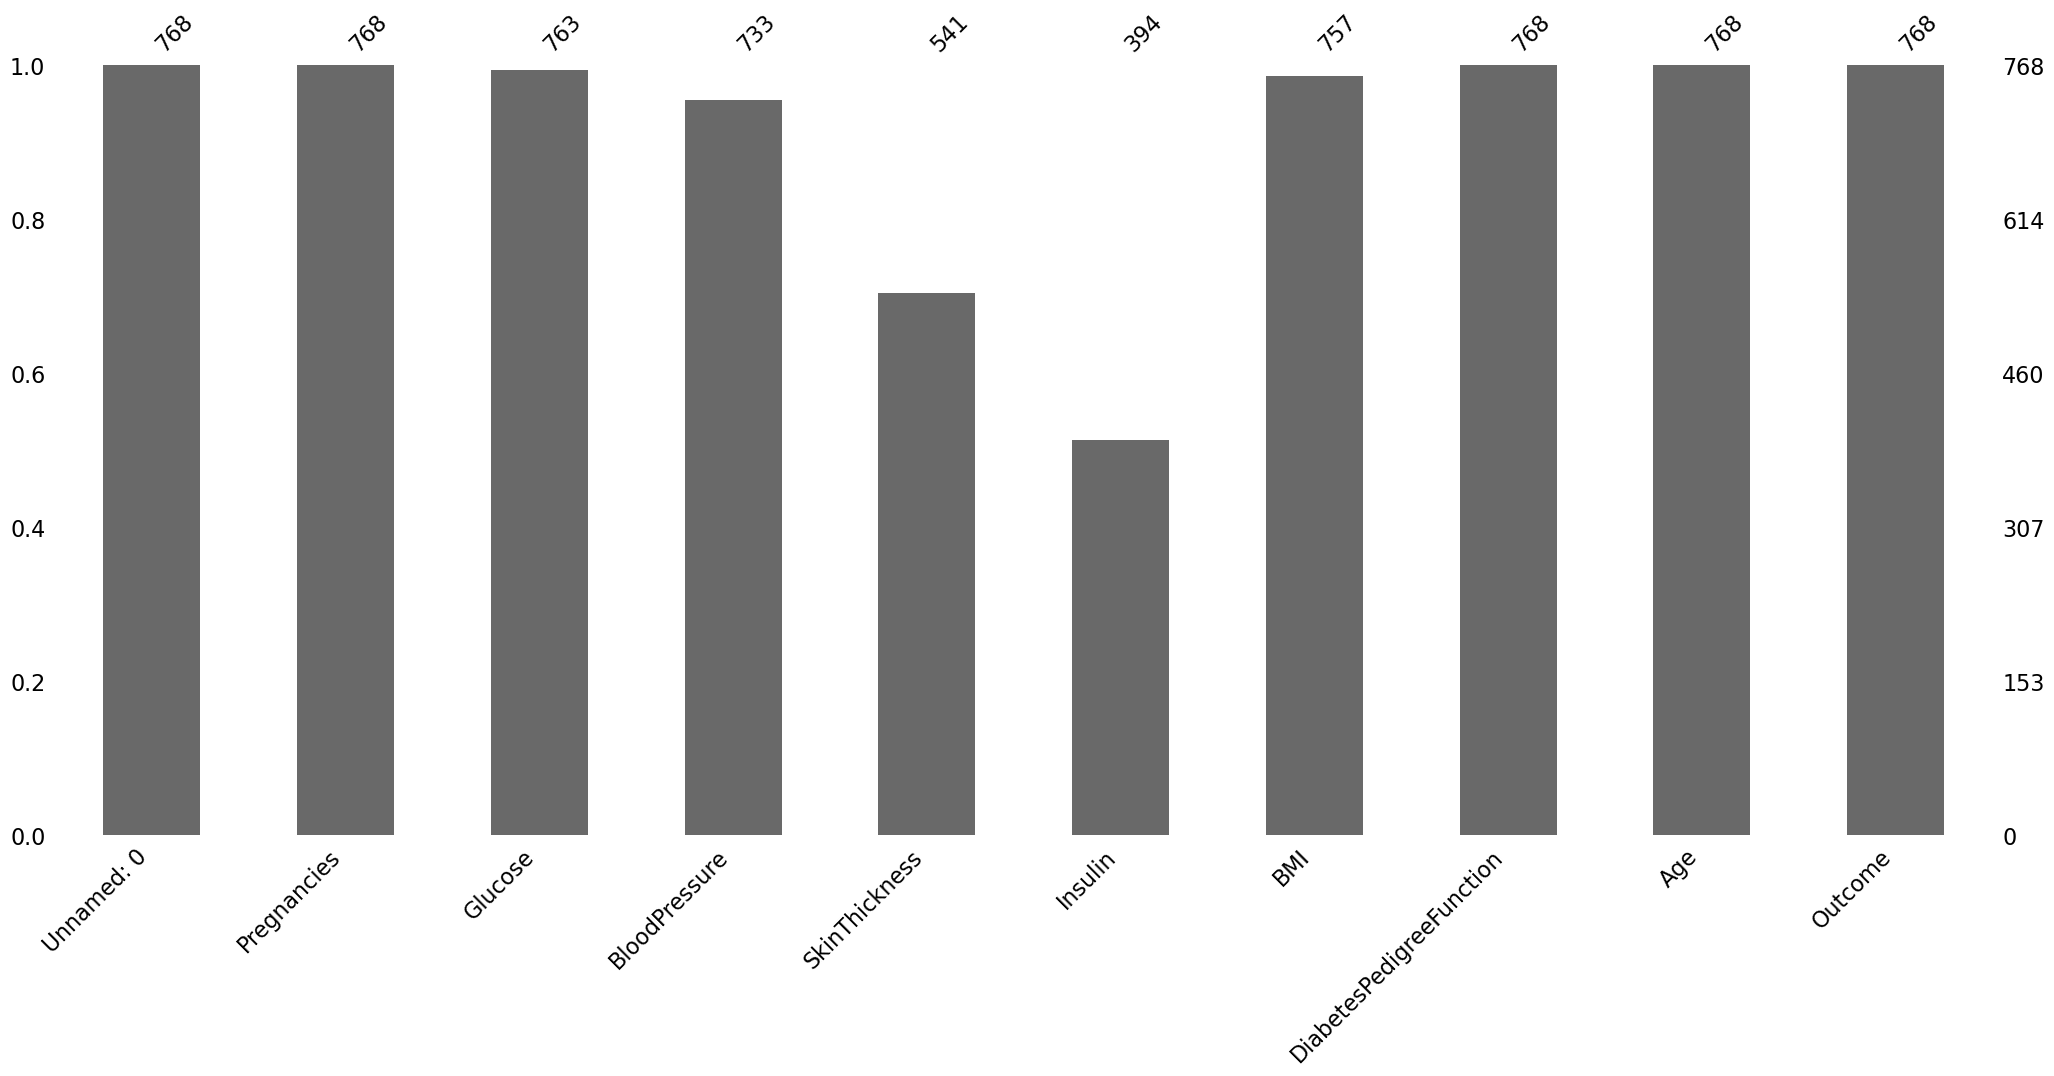

In [25]:
#Use Missingno to drop Null/NaN values:
import missingno as msno
msno.bar(dfile);

In [26]:
def median_target(var):   
    temp = dfile[dfile[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [27]:
columns = dfile.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    dfile.loc[(dfile['Outcome'] == 0 ) & (dfile[i].isnull()), i] = median_target(i)[i][0]
    dfile.loc[(dfile['Outcome'] == 1 ) & (dfile[i].isnull()), i] = median_target(i)[i][1]

In [28]:
#Show new dataframe:
dfile.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [29]:
#Show Null/NaN values: POST
dfile.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
#In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
#Yes to outliers
for feature in dfile:
    
    Q1 = dfile[feature].quantile(0.25)
    Q3 = dfile[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if dfile[(dfile[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Unnamed: 0 no
Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


##Locating Outliers:

In [31]:
#Use LOF Method to determine outliers:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(dfile)

array([ 1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [45]:
#Display Outlier Values:
dfile_scores = lof.negative_outlier_factor_
np.sort(dfile_scores)[0:40]

array([-2.23066908, -2.00724801, -1.95559729, -1.75367852, -1.75071677,
       -1.65238186, -1.64214903, -1.64209272, -1.63578628, -1.63358177,
       -1.62748193, -1.6195103 , -1.61007303, -1.59320235, -1.51588323,
       -1.50563929, -1.49525539, -1.46491471, -1.45182007, -1.45133687,
       -1.45106108, -1.42593419, -1.42261325, -1.41198041, -1.40954735,
       -1.40615911, -1.40087529, -1.39530471, -1.38323687, -1.36599707,
       -1.36457936, -1.35036564, -1.34852766, -1.34759668, -1.34602891,
       -1.34565452, -1.33304022, -1.33176994, -1.32428332, -1.31979283])

In [49]:
#We choose the threshold value according to lof scores
threshold = np.sort(dfile_scores)[6]
threshold

-1.6421490299410593

In [50]:
#We delete those that are higher than the threshold
outlier = dfile_scores > threshold
df = dfile[outlier]

In [51]:
# The size of the data set was examined.
dfile.shape

(768, 10)